# Chapter 2 Julia as a (powerful) calculator

## Julia as a Second Language, Erik Engheim  Chapter 2 Julia as a calculator
        
**Topics**

1. Working with integers, floating-point numbers,and fractions
2. Using variables to store long numbers
3. Creating reusable calculations by defining functions
4. The most basic types in Julia

## References Julia 1.9.0 Manual

1. Chapter 3 Variables
2. Chapter 4 Integers and Floating-Point Numbers
3. Chapter 5 Mathematical Operations and Elementary Functions

## Arithmetic operators

|Expression	|Name	|Description |
|:----------|-------|------------:|         
|+x	|unary plus	|the identity operation|
|-x	|unary minus	|maps values to their additive inverses|
|x + y	|binary plus |	performs addition |
|x - y	|binary minus|	performs subtraction |
|x * y	|times	|performs multiplication |
|x / y	|divide	|performs division |
|x ÷ y	|integer |divide	x / y, truncated to an integer |
|x \ y	|inverse |divide	|equivalent to y / x|
|x ^ y	|power	|raises x to the yth power|
|x % y	|remainder |	equivalent to rem(x,y)|

##### Note: To enter ÷ type `\div<TAB>`

In [1]:
2 + 3^2 + 7*8   # Int64 arithmetic

67

In [2]:
3^60 # Int64 arithmetic overflow

-3535985420588157519

In [3]:
BigInt(3)^60  # BigInt arithmetic

42391158275216203514294433201

In [4]:
10.5+ 3.4^3 + 2.7*3  # Float64 arithmetic

57.903999999999996

In [5]:
10.5f0+ 3.4f0^3 + 2.7f0*3  # Float32 arithmetic

57.904f0

In [6]:
BigFloat(10.5)+ BigFloat(3.4)^3 + BigFloat(2.7)*3  # BigFloat arithmetic

57.90399999999999745270429230004091411583183327562532634708149643565996480226474

In [7]:
10 / 3 # Float64 division       

3.3333333333333335

In [8]:
10.0 / 3 # Float64 division

3.3333333333333335

In [9]:
10 ÷ 4    # integer division; the result type is Int64

2

In [10]:
10.0 ÷ 4.0 # the result type is Float64

2.0

#### Vectorized "dot" operators

For every binary operation like ^, there is a corresponding "dot" operation .^ that is automatically definedto perform ^ element-by-element on arrays.

**Example** `[1,2,3] ^ 3` is not defined,but `[1,2,3] .^ 3` is defined.

In [11]:
[1,2,3] .^ 3

3-element Vector{Int64}:
  1
  8
 27

In [12]:
[1,2.0,3] .^ 3

3-element Vector{Float64}:
  1.0
  8.0
 27.0

In [13]:
[1,'2',3] .^ 3

3-element Vector{Any}:
  1
   "222"
 27

In [14]:
[1,2,3] .+ 2

3-element Vector{Int64}:
 3
 4
 5

## Using constants and variables

Identifiers can be used to give names to constants, variables, types, and functions in
Julia.

1. Math constants in julia includes

    |Constant |Tab Completion |Meaning |
    |:--------|---------------|--------|
    | π |`\pi` | Pi |
    | e | `\euler`|Euler’s number |
        | ϕ |`\varphi`| Golden's ratio|
  
2. In general identifiers for variable names are case-sensitive and can include most Unicode characters as long as they do not start with a digit and they are not reserved keywords. Some examples of variable names include:

     speed,  Speed, _X, 😠 (`\:angry:<TAB>`), and 😡 (`\:rage:<TAB>`)

3. Julia is unusual in its frequent use of Greek letters, such as π (`\pi`), θ (`\theta)`, α (`\alpha`) and Δ (`Delta`). The reason for this is that mathematics is usually written using Greek letters. When a mathematical
equation is implemented in code, it becomes easier to read the code if it looks
similar to the equation.

In [15]:
 a = 2*π, π

(6.283185307179586, π)

In [16]:
😠 = 10
😡 = 😠 + 90

100

## Using elementary math functions 1

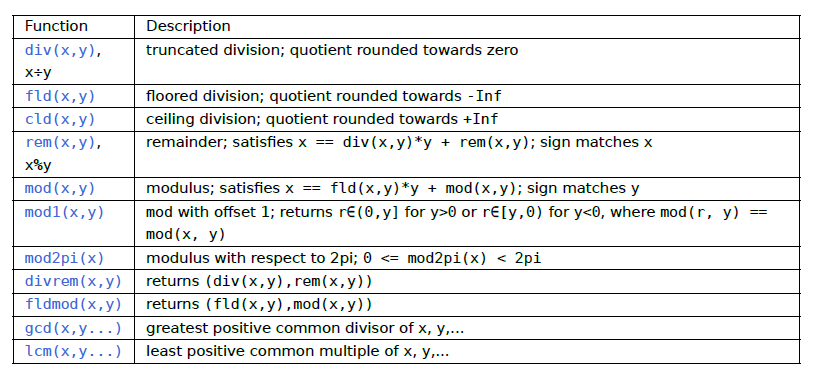

In [17]:
fld(9, 2), fld(-9, 2), cld(9, 2), cld(-9, 2)

(4, -5, 5, -4)

In [18]:
rem(10, 3), rem(-10, 3), rem(10, -3), rem(-10, -3)

(1, -1, 1, -1)

In [19]:
mod(10, 3), mod(-10, 3), mod(10, -3), mod(-10,-3)

(1, 2, -2, -1)

In [20]:
?gcd

search: gcd gcdx significand



```
gcd(x, y...)
```

Greatest common (positive) divisor (or zero if all arguments are zero). The arguments may be integer and rational numbers.

!!! compat "Julia 1.4"
    Rational arguments require Julia 1.4 or later.


# Examples

```jldoctest
julia> gcd(6, 9)
3

julia> gcd(6, -9)
3

julia> gcd(6, 0)
6

julia> gcd(0, 0)
0

julia> gcd(1//3, 2//3)
1//3

julia> gcd(1//3, -2//3)
1//3

julia> gcd(1//3, 2)
1//3

julia> gcd(0, 0, 10, 15)
5
```


In [21]:
gcd(100, 30)

10

In [22]:
gcd(100, 30, 35)

5

In [23]:
gcd(BigInt(2*3*5*7*7*11), BigInt(123_456_789_012_345_678_901_234_567_890))

210

## Using elementary math functions 2

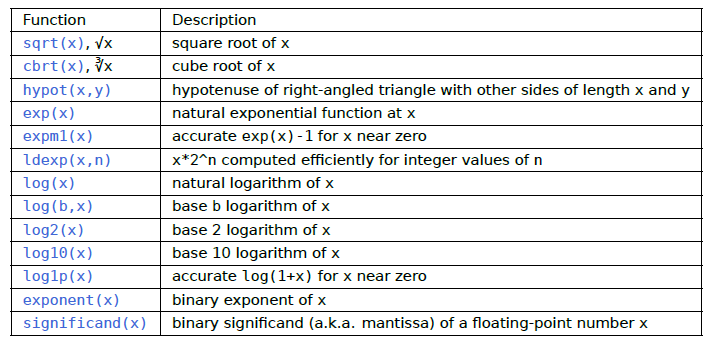

In [24]:
sqrt(6), √6, cbrt(6), ∛6   # \sqrt<TAB> -> √   \cber\<TAB> -> ∛

(2.449489742783178, 2.449489742783178, 1.8171205928321397, 1.8171205928321397)

In [25]:
.√ [1,2,3], sqrt.(1:3)  # dot operations for unary operators and functions

([1.0, 1.4142135623730951, 1.7320508075688772], [1.0, 1.4142135623730951, 1.7320508075688772])

## Trigonometric and hyperbolic functions

1. All the standard trigonometric and hyperbolic functions are defined (with radians):

`sin cos tan cot sec csc
sinh cosh tanh coth sech csch
asin acos atan acot asec acsc
asinh acosh atanh acoth asech acsch
sinc cosc`

2. In order to compute trigonometric functions with degrees instead of radians, suffix the function with d. For example, sind(x) computes the sine of x where x is specified in degrees. The complete list of trigonometric functions with degree variants is:

`sind cosd tand cotd secd cscd
asind acosd atand acotd asecd acscd`

In [26]:
sin(π / 2), sind(90)

(1.0, 1.0)

## Using the ans variable and literal coefficients

1. There is a special variable in Julia that only exists when you use Julia interactively,
called ans (answer). The Julia REPL assigns the value of the last expression you evaluate
to it

2. If you read mathematics, you may have noticed that something like `3 × x + 2 × y`would
be written as `3x + 2y`. Julia lets you write a multiplication in the same manner. We refer
to these as literal coefficients, which is shorthand for multiplication between a number
literal and a constant (like pi), variable, or expressions:

In [27]:
2pi, 2π

(6.283185307179586, 6.283185307179586)

In [28]:
2(7+6)

26

In [29]:
x = 2; 2(x^3 - 3x + 8)

20

In [30]:
y = ans; 10y

200

In [31]:
x = 5; 1/2x   # literal coefficient has higher precedence than arithmetice operators

0.1

## Different number types and their bit length in Julia

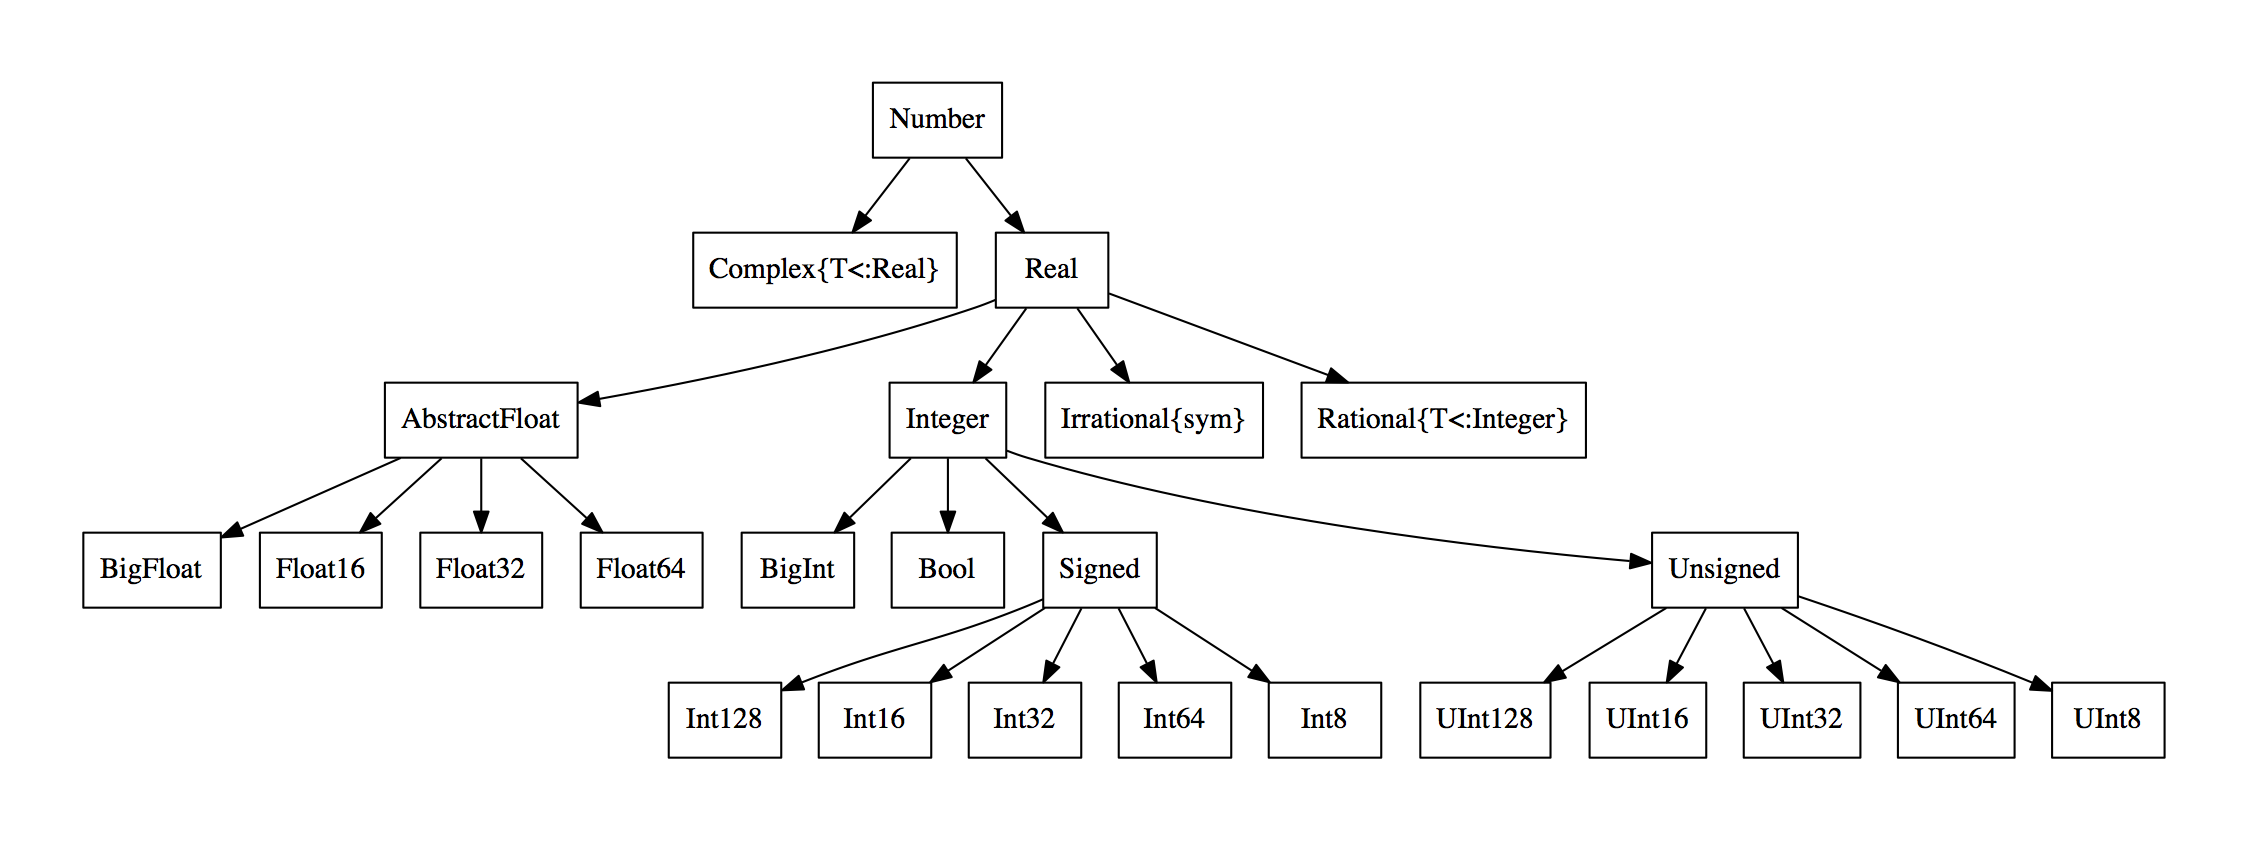


!!!note

Type classifications:

1. Abstract types
2. Primitive concrete types
3. Compositive concrete types (i.e., types defined by `struct`)

How about Fixed-point number type?
   

In [32]:
typeof(12), typeof(2.3), typeof(2.3f0)

(Int64, Float64, Float32)

In [33]:
x = Int8(12); typeof(x)

Int8

In [36]:
x = (typemin(Int8), typemax(Int8))

(-128, 127)

In [37]:
println("Min/Max of Int8 = $x")    # $ for string interpolation

Min/Max of Int8 = (-128, 127)


In [38]:
y = (typemin(Int64), typemax(Int64))

(-9223372036854775808, 9223372036854775807)

In [39]:
println("Min/Max of Int64 = $y")

Min/Max of Int64 = (-9223372036854775808, 9223372036854775807)


### Overflow

In [40]:
typemax(Int64) + 1 # overflow

-9223372036854775808

In [41]:
BigInt(typemax(Int64)) + 1

9223372036854775808

In [42]:
typemin(Float32), typemax(Float32)

(-Inf32, Inf32)

In [43]:
1.0/0

Inf

In [44]:
0/0

NaN

### Floating points (Float16, Float32, and Float64) accuracy

In [45]:
plus(x::Union{Float32, Float64}, y::Union{Float32,Float64}) = x + y

plus (generic function with 1 method)

In [46]:
r = ones(Float32, 16_777_215);

In [47]:
typeof(r)

Vector{Float32} (alias for Array{Float32, 1})

In [48]:
reduce(plus, r)  # Same as sum(r)

1.6777215f7

In [49]:
r1 = ones(Float32, 16_777_216);

In [50]:
reduce(plus, r1)

1.6777216f7

In [51]:
r2 = ones(Float32, 16_777_217);

In [52]:
reduce(plus, r2)

1.6777216f7

In [53]:
sum(r2)

1.6777216f7

In [54]:
r3 =ones(Float32, 16_777_217);

In [65]:
reduce(plus, r3)

1.6777216f7

In [66]:
y = reduce(plus, r1)

1.6777216f7

In [59]:
[y+i for i in 0f0:1f0:10f0]  # list comprehension

11-element Vector{Float32}:
 1.6777216f7
 1.6777216f7
 1.6777218f7
 1.677722f7
 1.677722f7
 1.677722f7
 1.6777222f7
 1.6777224f7
 1.6777224f7
 1.6777224f7
 1.6777226f7

In [67]:
r4 = ones(Float64, 16_777_216);

In [68]:
y2 = reduce(plus, r4)

1.6777216e7

In [62]:
[y2+i for i in 0f0:1f0:10f0]

11-element Vector{Float64}:
 1.6777217e7
 1.6777218e7
 1.6777219e7
 1.677722e7
 1.6777221e7
 1.6777222e7
 1.6777223e7
 1.6777224e7
 1.6777225e7
 1.6777226e7
 1.6777227e7

In [69]:
[(y+i, y2+i) for i in 0f0:1f0:10f0]

11-element Vector{Tuple{Float32, Float64}}:
 (1.6777216f7, 1.6777216e7)
 (1.6777216f7, 1.6777217e7)
 (1.6777218f7, 1.6777218e7)
 (1.677722f7, 1.6777219e7)
 (1.677722f7, 1.677722e7)
 (1.677722f7, 1.6777221e7)
 (1.6777222f7, 1.6777222e7)
 (1.6777224f7, 1.6777223e7)
 (1.6777224f7, 1.6777224e7)
 (1.6777224f7, 1.6777225e7)
 (1.6777226f7, 1.6777226e7)

## Defining Functions

There are three ways to define functions in Julia:

1. One-line named functions


`f(x) = 2x^3 -3x^2 + 1`

2. Multi-line named functions


`function f(x)
       2x^3 -3x^2 + 1
 end`

3. Anonymous (no-name) function

   `       x -> 2x^3 -3x^2 + 1`

In [70]:
f(x) = 2x^3 -3x^2 + 1

f (generic function with 1 method)

In [71]:
f(5)

176

In [73]:
f.([1,2,3,4])    # dot operation on function

4-element Vector{Int64}:
  0
  5
 28
 81

In [74]:
map(x->2x^3 -3x^2 + 1, [1,2,3,4])

4-element Vector{Int64}:
  0
  5
 28
 81

## Operators are functions

Operators are functions, for example

    `+(1, 3) == 1 + 2

In [75]:
2 + 5, +(2,5)

(7, 7)

In [76]:
square(x)= x^2

square (generic function with 1 method)

In [77]:
sqrt(reduce(+, (map(square, [3,4]))))

5.0

In [78]:
sphere_volume(r)      = 4π * r^3 /3  
cylinder_volume(r, h) = π * r^2 * h
cone_value(r, h)      = π * r^2 * h/3

cone_value (generic function with 1 method)